In [1]:
pip install cartopy cmocean

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotting_functions as pf
import xarray as xr
import cmocean
import numpy as np


ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [3]:
min_lonGS = -82
min_latGS = 25
max_lonGS = -50
max_latGS = 43

In [6]:
data=xr.open_dataset('../../../../work/daily_mean_sst_GS_201801-03.nc')

In [7]:
data

<xarray.Dataset> Size: 360MB
Dimensions:            (y: 843, x: 1160, time_counter: 90)
Coordinates:
    nav_lat            (y, x) float32 4MB ...
    nav_lon            (y, x) float32 4MB ...
Dimensions without coordinates: y, x, time_counter
Data variables:
    daily_mean_sst_GS  (time_counter, y, x) float32 352MB ...

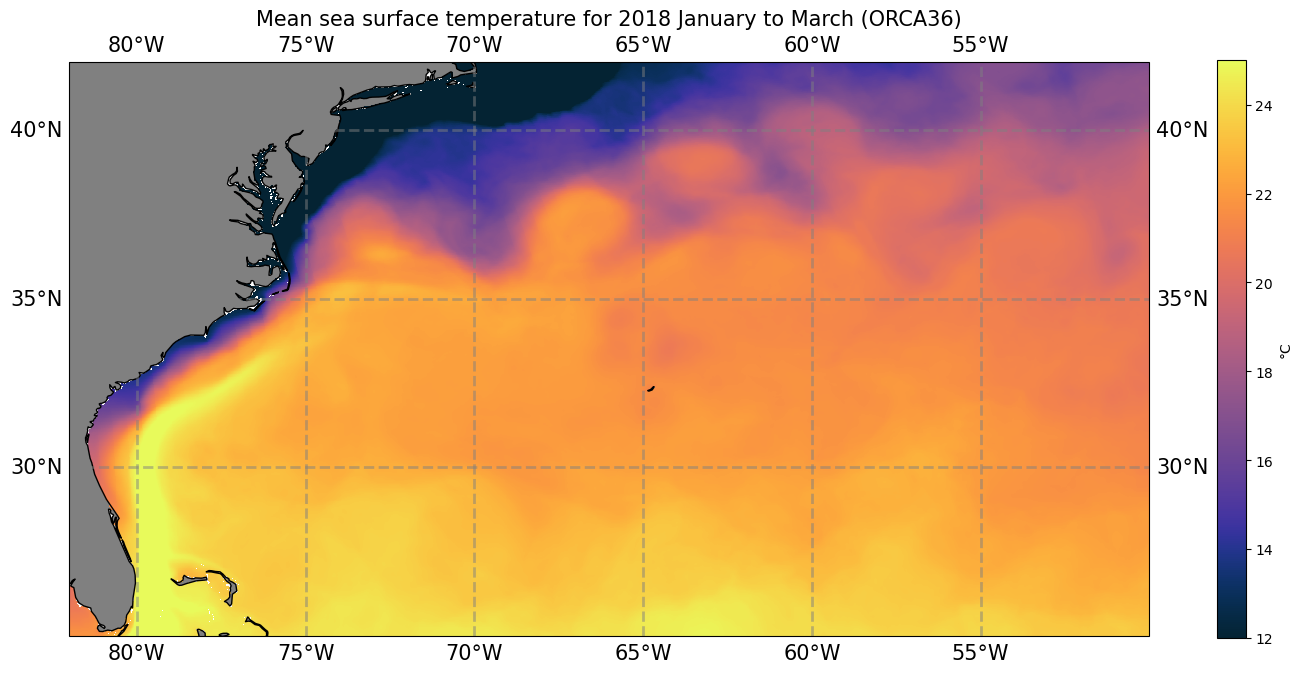

In [11]:
pf.map_mean_GS_ORCA36(data.daily_mean_sst_GS.mean(dim='time_counter'),data.nav_lon,data.nav_lat,'Mean sea surface temperature for 2018 January to March (ORCA36)', '°C', 12, 25, cmocean.cm.thermal,"../plots/ORCA36_MEAN-SST_GS_201801-03.png",min_lonGS, max_lonGS, min_latGS, max_latGS)



/opt/mamba/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


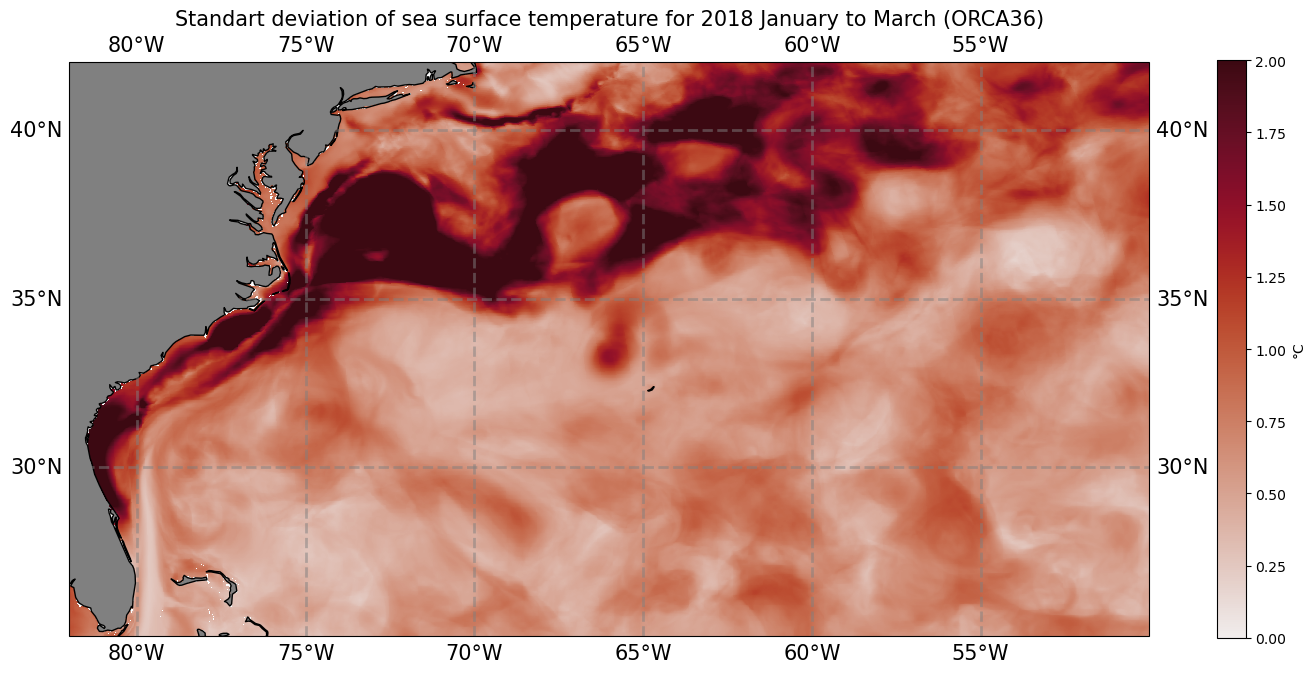

In [12]:
pf.map_mean_GS_ORCA36(data.daily_mean_sst_GS.std(dim='time_counter'),data.nav_lon,data.nav_lat,'Standart deviation of sea surface temperature for 2018 January to March (ORCA36)', '°C', 0, 2, cmocean.cm.amp,"../plots/ORCA36_STD-SST_GS_201801-03.png",min_lonGS, max_lonGS, min_latGS, max_latGS)

